In [ ]:
# Read the database, and clean the data using the processing modules
import re
import numpy as np
import pandas as pd
from field_data_processor import FieldDataProcessor
# from weather_data_processor import WeatherDataProcessor
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

config_params = {
    "sql_query": """
            SELECT *
            FROM geographic_features
            LEFT JOIN weather_features USING (Field_ID)
            LEFT JOIN soil_and_crop_features USING (Field_ID)
            LEFT JOIN farm_management_features USING (Field_ID)
            """,
    "db_path": 'sqlite:///Maji_Ndogo_farm_survey_small.db',
    "columns_to_rename": {'Annual_yield': 'Crop_type', 'Crop_type': 'Annual_yield'},
    "values_to_rename": {'cassaval': 'cassava', 'wheatn': 'wheat', 'teaa': 'tea'},
    "weather_csv_path": "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Maji_Ndogo/Weather_station_data.csv",
    "weather_mapping_csv": "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Maji_Ndogo/Weather_data_field_mapping.csv",
    "regex_patterns" : {
            'Rainfall': r'(\d+(\.\d+)?)\s?mm',
            'Temperature': r'(\d+(\.\d+)?)\s?C',
            'Pollution_level': r'=\s*(-?\d+(\.\d+)?)|Pollution at \s*(-?\d+(\.\d+)?)'
            },
}
# Ignoring the field data for now.
field_processor = FieldDataProcessor(config_params)
field_processor.process()
field_df = field_processor.df

# We're not going to use the weather data this time, so we'll ignore it.
# weather_processor = WeatherDataProcessor(config_params)
# weather_processor.process()
# weather_df = weather_processor.weather_df

dataset = field_df.drop("Weather_station", axis=1)

2024-05-16 05:13:21,477 - data_ingestion - INFO - Database engine created successfully.
2024-05-16 05:13:21,644 - data_ingestion - INFO - Query executed successfully.
2024-05-16 05:13:21,645 - field_data_processor.FieldDataProcessor - INFO - Sucessfully loaded data.
2024-05-16 05:13:21,651 - field_data_processor.FieldDataProcessor - INFO - Swapped columns: Annual_yield with Crop_type
2024-05-16 05:13:22,968 - data_ingestion - INFO - CSV file read successfully from the web.


In [ ]:
dataset

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,885.7,-4.3,33.4,14.55,0.61,Sandy,5.741063,3.286828e-01,1.1,0.609930,potato,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,501.1,-4.8,32.1,13.65,0.54,Sandy,5.445833,1.602583e-01,8.7,3.812289,maize,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,1586.6,-3.8,33.4,14.80,0.64,Volcanic,5.385873,8.221326e-09,2.1,1.681629,tea,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,1272.2,-6.2,34.6,14.20,0.63,Silt,5.562508,6.917245e-10,1.3,0.659874,cassava,0.507595


In [ ]:
# Validate the data

dataset.to_csv('sampled_field_df.csv', index=False)

!pytest validate_data.py -v

import os# Define the file paths
field_csv_path = 'sampled_field_df.csv'

# Delete sampled_field_df.csv if it exists
if os.path.exists(field_csv_path):
    os.remove(field_csv_path)
    print(f"Deleted {field_csv_path}")
else:
    print(f"{field_csv_path} does not exist.")

============================= test session starts =============================
platform win32 -- Python 3.11.7, pytest-7.4.0, pluggy-1.0.0 -- C:\Users\Kuloba\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\Kuloba\Downloads
plugins: anyio-4.2.0
collecting ... collected 4 items

validate_data.py::test_read_field_dataframe_shape PASSED                 [ 25%]
validate_data.py::test_field_dataframe_columns PASSED                    [ 50%]
validate_data.py::test_field_dataframe_non_negative_elevation PASSED     [ 75%]
validate_data.py::test_crop_types_are_valid PASSED                       [100%]

============================== 4 passed in 1.64s ==============================
Deleted sampled_field_df.csv


# Analysis

## Visualising the relationships

Our goal is to determine whether any of the features in our dataset are influencing the `Standard_yield` of a farm. If we can figure out what these relationships are, then we can use them to start predicting what future yields will be, based on these features.

For this analysis, we want to find whether any features have a linear relationship with `Standard_yield` so that we can fit a linear regression model to the data. This is important because if we try and fit a linear regression model to non-linear data, our predictions won't be good.

Any of the features could have an impact on the `Standard_yield`. Let's begin with `Ave_temps`, the average temperature of the region, and its relationship to `Standard_yield`.

2024-05-16 05:18:12,587 - matplotlib.font_manager - INFO - generated new fontManager


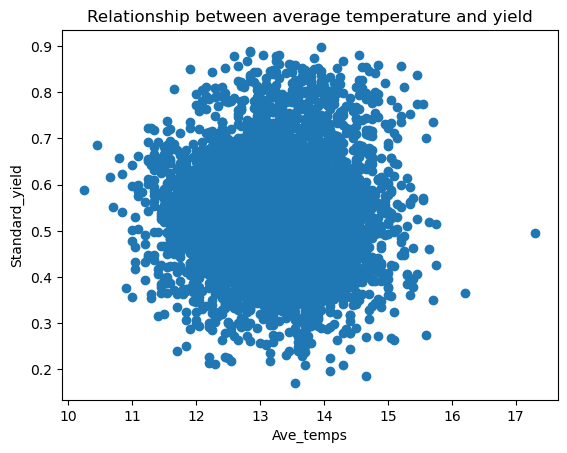

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataset['Ave_temps'], dataset['Standard_yield'])
plt.xlabel('Ave_temps')
plt.ylabel('Standard_yield')
plt.title('Relationship between average temperature and yield')
plt.show()

In [ ]:
from scipy.stats import pearsonr

In [ ]:
def get_correlation(df, col1, col2):
    correlation, _ = pearsonr(df[col1], df[col2])
    return correlation

In [ ]:
correlation = get_correlation(dataset,'Ave_temps','Standard_yield')
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.006785950289020184


## Pollution as a predictor


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def fit_linear_regression_model(df, pollution_col, yield_col):
    X = df[[pollution_col]]
    y = df[yield_col]
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)

    return model, predictions, y

In [ ]:
model, predictions, y_values = fit_linear_regression_model(dataset, 'Pollution_level', 'Standard_yield')
print(f"Model: {model}")
print(f"Predictions: {predictions}")
print(f"Actual Y-Values: {y_values}")

Model: LinearRegression()
Predictions: [0.5540956  0.50920888 0.51515565 ... 0.56626844 0.56626844 0.52896886]
Actual Y-Values: 0       0.577964
1       0.486302
2       0.649647
3       0.532348
4       0.555076
          ...   
5649    0.554482
5650    0.438194
5651    0.800776
5652    0.507595
5653    0.453064
Name: Standard_yield, Length: 5654, dtype: float64


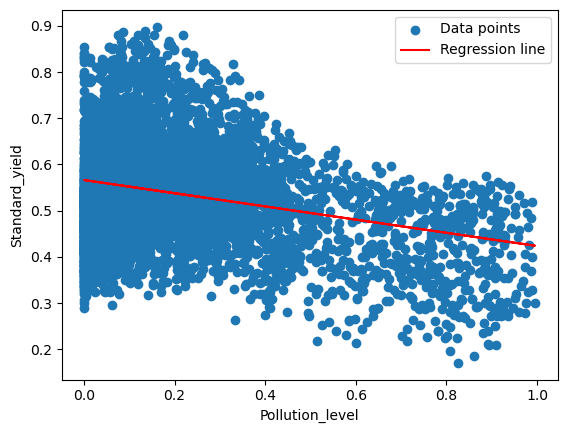

In [ ]:
# Scatter plot to visualise the relationship between pollution and crop yields
X = dataset[['Pollution_level']]
y = dataset['Standard_yield']

plt.scatter(X, y, label='Data points')
plt.plot(X, predictions, color='red', label='Regression line')
plt.xlabel('Pollution_level')
plt.ylabel('Standard_yield')
plt.legend()
plt.show()

In [ ]:
Pollution_correlation = get_correlation(dataset,'Pollution_level','Standard_yield')
print("Pearson correlation coefficient:", Pollution_correlation)

Pearson correlation coefficient: -0.2857609646210545


In [ ]:
def get_slope_intercept(model):
    slope = model.coef_[0]
    intercept = model.intercept_
    return slope, intercept

In [ ]:
slope, intercept = get_slope_intercept(model)
print("Slope:", slope)
print("Intercept:", intercept)

Slope: -0.14276177209866076
Intercept: 0.566268441539338


## Evaluating pollution's predictive power

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
def calculate_evaluation_metrics(predictions, y_values):

    r2 = r2_score(y_values, predictions)
    mae = mean_absolute_error(y_values, predictions)
    mse = mean_squared_error(y_values, predictions)
    rmse = np.sqrt(mse)

    return r2, mae, mse, rmse

In [ ]:
evaluation_metrics = calculate_evaluation_metrics(predictions, y_values)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")

Evaluation Metrics:
R-squared: 0.08165932890115568
MAE: 0.08554642090904993
MSE: 0.011477732254034844
RMSE: 0.10713417873878926


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def data_train_test_split(df, pollution_col, yield_col):
    X = df[[pollution_col]]
    y = df[yield_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = data_train_test_split(dataset, 'Pollution_level', 'Standard_yield')
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (4523, 1), X_test shape: (1131, 1)
y_train shape: (4523,), y_test shape: (1131,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def train_split_linear_regression_model(X_train, X_test, y_train, y_test):
    model = LinearRegression().fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions, y_test

In [ ]:
train_test_model, predictions_test, y_test = train_split_linear_regression_model(X_train, X_test, y_train, y_test)
print(f"Train-Test Model: {train_test_model}")
print(f"Test Predictions: {predictions_test}")
print(f"Test Actual Y-Values: {y_test}")

Train-Test Model: LinearRegression()
Test Predictions: [0.56412206 0.56167249 0.55638552 ... 0.53129108 0.53868457 0.56431394]
Test Actual Y-Values: 4816    0.446290
5096    0.650771
4706    0.531284
1499    0.516429
3544    0.555724
          ...   
3982    0.540212
4952    0.670387
1071    0.353658
718     0.535224
4103    0.470315
Name: Standard_yield, Length: 1131, dtype: float64


## Diagnosing model fit through residual analysis

From our analysis, it seems as though neither `Ave_temps` or `Pollution_level` have a strong linear fit with `Standard_yield`. However, even if we had obtained good results from our evaluation metrics, there are still other crucial assumptions we need to verify to ensure our model is well-fitted. Residual analysis plays a pivotal role in diagnosing the fit of linear regression models, helping us understand whether the assumptions of linearity, independence, and homoscedasticity (constant variance) of residuals are met.

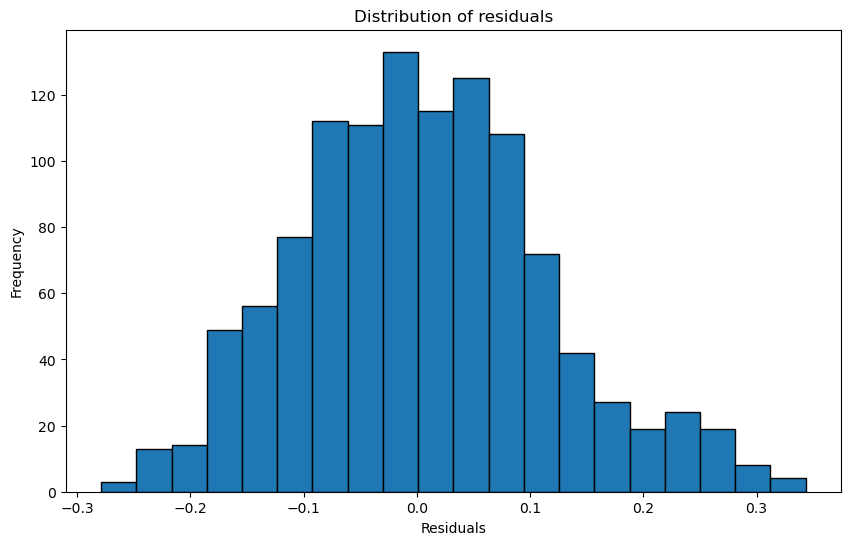

In [ ]:
import matplotlib.pyplot as plt

#  Histogram of residuals
residuals = y_test - predictions_test
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Distribution of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

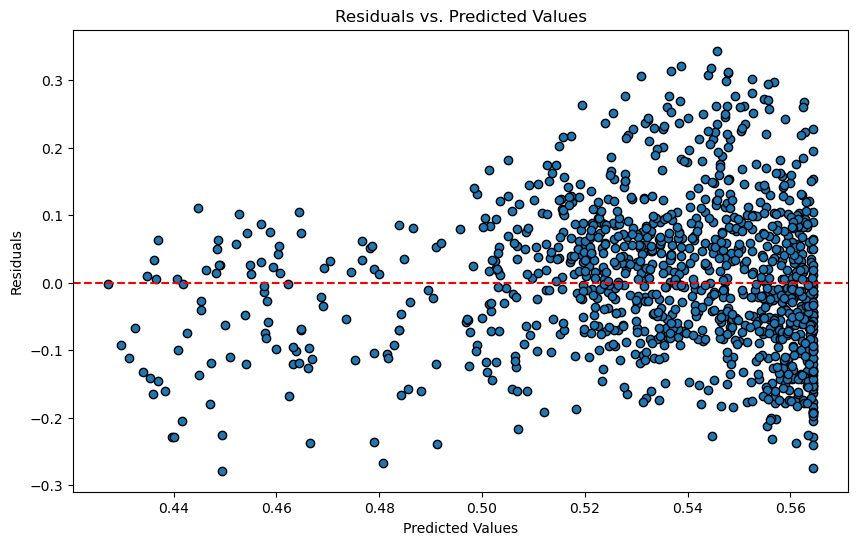

In [ ]:
#  Draw the scatter plot of residuals against the predicted values

plt.figure(figsize=(10, 6))
plt.scatter(predictions_test, residuals, edgecolor='black')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
import numpy as np

In [ ]:
def calculate_residuals_statistics(predictions, y_test):
    residuals = y_test - predictions
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)
    return mean_residual, std_residual

In [ ]:
mean_residual, std_residual = calculate_residuals_statistics(predictions_test, y_test)
print(f"Mean: {mean_residual}\nStandard deviation: {std_residual}")

Mean: 0.00585802319232171
Standard deviation: 0.11052745268770955
